# Lung Cancer Detection

A machine learning model that can detect whether a patient has lung cancer or not.

## Data

The data is from: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

#### About the data

Total no. of attributes: 16
No. of instances: 284

Attribute information:

* Gender: M(male), F(female)
* Age: Age of the patient
* Smoking: YES = 2, NO = 1.
* Yellow fingers: YES = 2, NO = 1.
* Anxiety: YES = 2, NO = 1.
* Peer_pressure: YES = 2, NO = 1.
* Chronic Disease: YES = 2, NO = 1.
* Fatigue: YES = 2, NO = 1.
* Allergy: YES = 2, NO = 1.
* Wheezing: YES = 2, NO = 1.
* Alcohol: YES = 2, NO = 1.
* Coughing: YES = 2, NO = 1.
* Shortness of Breath: YES = 2, NO = 1.
* Swallowing Difficulty: YES = 2, NO = 1.
* Chest pain: YES = 2, NO = 1.
* Lung Cancer: YES, NO.


## How the model was made

The model was made using [Scikit-Learn](https://scikit-learn.org) an excellent machine learning library. I used Random Forest Classifer as the model.

## How the notebook is structured

* Explore the data
* Visualize our data
* Fit and instantiate the model
* Describe our model

## What you will find

* Awesome Graphs that visualize the data
* Use of [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/)
* Use of Scikit-Learn's manu features
* Testing with two models
* A ROC Curve
* Visual Confusion Matrix
* A custom Classification Report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

## Explore our data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/machine-learning-projects/lung-cancer-detection/lung-cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
len(df)

309

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic disease        309 non-null    int64 
 7   fatigue                309 non-null    int64 
 8   allergy                309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness of breath    309 non-null    int64 
 13  swallowing difficulty  309 non-null    int64 
 14  chest pain             309 non-null    int64 
 15  lung_cancer            

In [8]:
df.describe()

,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [9]:
df.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

In [10]:
df["lung_cancer"].replace({"YES": 1, "NO": 0}, inplace = True)
df["gender"].replace({"M": 1, "F": 0}, inplace = True)
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 309 non-null    int64
 1   age                    309 non-null    int64
 2   smoking                309 non-null    int64
 3   yellow_fingers         309 non-null    int64
 4   anxiety                309 non-null    int64
 5   peer_pressure          309 non-null    int64
 6   chronic disease        309 non-null    int64
 7   fatigue                309 non-null    int64
 8   allergy                309 non-null    int64
 9   wheezing               309 non-null    int64
 10  alcohol consuming      309 non-null    int64
 11  coughing               309 non-null    int64
 12  shortness of breath    309 non-null    int64
 13  swallowing difficulty  309 non-null    int64
 14  chest pain             309 non-null    int64
 15  lung_cancer            309 non-null    i

In [12]:
df.isna().sum()

gender                   0
age                      0
smoking                  0
yellow_fingers           0
anxiety                  0
peer_pressure            0
chronic disease          0
fatigue                  0
allergy                  0
wheezing                 0
alcohol consuming        0
coughing                 0
shortness of breath      0
swallowing difficulty    0
chest pain               0
lung_cancer              0
dtype: int64

## Visualize our data

In [13]:
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


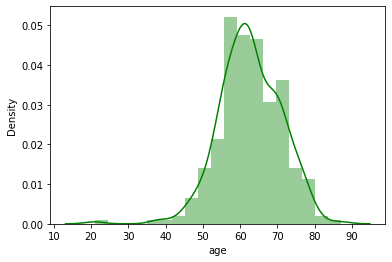

In [14]:
sns.distplot(df["age"], color = "green");

In [15]:
condition = ["Does not have Lung Cancer", "Does have Lung Cancer"]

have_or_not = df["lung_cancer"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]

fig = px.pie(values = df["lung_cancer"].value_counts(), names = condition, width = 800, height = 400, color_discrete_sequence = ["skyblue", "violet"], title = "Percentage whether patient has Lung Cancer or not")
fig.show()

In [16]:
genders = ["Male", "Female"]

fig = px.pie(values = df["gender"].value_counts(), names = genders, width = 800, height = 400, color_discrete_sequence = ["skyblue", "orange"], title = "Male and Female Lung Cancer Frequency")
fig.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



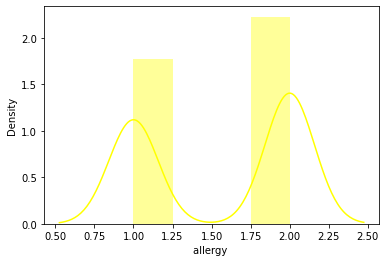

In [17]:
sns.distplot(df["allergy "], color = "yellow");

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



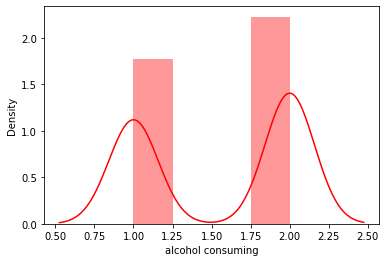

In [18]:
sns.distplot(df["alcohol consuming"], color = "red");

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



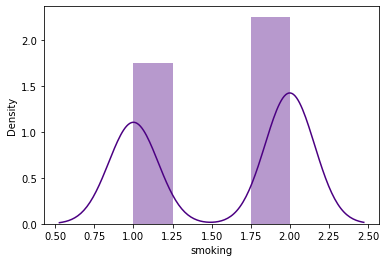

In [19]:
sns.distplot(df["smoking"], color = "indigo");

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



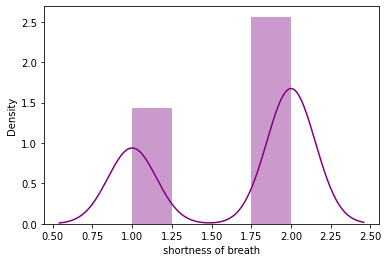

In [20]:
sns.distplot(df["shortness of breath"], color = "purple");

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



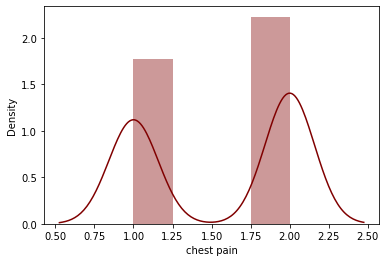

In [21]:
sns.distplot(df["chest pain"], color = "maroon");

In [22]:
smokers = ["Smoker", "Non-smoker"]

fig = px.pie(values = df["smoking"].value_counts(), names = smokers, width = 800, height = 400, color_discrete_sequence = ["lightgreen", "violet"], title = "Smoker and Non-smoker Lung Cancer Frequency")
fig.show()

In [23]:
alcohol = ["Alcohol", "No alcohol"]

fig = px.pie(values = df["alcohol consuming"].value_counts(), names = alcohol, width = 800, height = 400, color_discrete_sequence = ["lightgreen", "violet"], title = "Alcohol Consumer and Non-alcohol Consumer Lung Cancer Frequency")
fig.show()

## Fit and instantiate model

#### Test 2 models

In [24]:
def evaluate(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [25]:
scaler = StandardScaler()

X = df.drop("lung_cancer", axis = 1)
y = df["lung_cancer"]

df = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain
0,0.952579,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475
1,0.952579,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475
2,-1.049781,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475
3,0.952579,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475
4,-1.049781,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
models = {
         "SVC": SVC(),
         "Naive Bayes": GaussianNB()      
        }

In [28]:
model_scores = evaluate(models = models,
                        X_train = X_train,
                        X_test = X_test,
                        y_train = y_train,
                        y_test = y_test)

model_scores

{'SVC': 0.967741935483871, 'Naive Bayes': 0.9516129032258065}

In [29]:
model_scores = model_scores.values()
model_scores = list(model_scores)
svc = model_scores[0]
nb = model_scores[1]

In [30]:
print(f"SVC: {svc * 100:.2f}%")
print(f"Naive Bayes: {nb * 100:.2f}%")

SVC: 96.77%
Naive Bayes: 95.16%


### Final *fitting* and model description

In [31]:
model = SVC(probability = True)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.967741935483871

In [32]:
y_preds = model.predict(X_test)

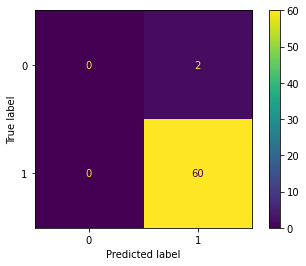

In [33]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, 
                                        y_pred = y_preds);

In [42]:
def model_report(y_test, y_preds):
    print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds)}")
    print(f"Recall: {recall_score(y_test, y_preds)}")
    print(f"F1 Score: {f1_score(y_test, y_preds)}")

In [43]:
model_report(y_test, y_preds)

Accuracy: 96.77%
Precision: 0.967741935483871
Recall: 1.0
F1 Score: 0.9836065573770492


In [44]:
y_probs = model.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.9712156 , 0.98928537, 0.91846205, 0.99999184, 0.97737999,
       0.88978749, 0.97678021, 0.96022902, 0.87467937, 0.9624918 ])

In [45]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = "green", label = "ROC")

    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend();

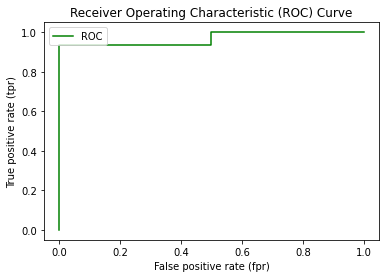

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
plot_roc_curve(fpr, tpr)